In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
#import ROOT
import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
import melp
import melp.taft

Welcome to JupyROOT 6.24/06


In [3]:
#import melp.legacy as melp

#test = melp.TileHitAngle("run42_20000.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [4]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [5]:
mu3e_detector = Detector.initFromROOT("run42_20000.root")
#mu3e_detector = Detector.initFromROOT("sorted_truth.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [6]:
#mu3e_detector.save("test_detector_file")

In [7]:
melp.select(mu3e_detector)

In [8]:
melp.info()

Detector(TileDetector=Loaded Tiles: 5824, SensorModules=<melp.src.sensor.SensorModule object at 0x7fc61485ac20>))


In [9]:
print(mu3e_detector)

Detector(TileDetector=Loaded Tiles: 5824, SensorModules=<melp.src.sensor.SensorModule object at 0x7fc61485ac20>))


In [10]:
melp.addTileHits("run42_20000.root", truth=True, traj=True)

In [11]:
mu3e_detector.TileDetector.tile[200000].hits[2].trajectory


Trajectory(id=760728, v_pos=[5.845152474135161, 5.80241314929496, -1000.0], v_dir=[4.889830754746951, 0.642285775892458, 27.442700992405364], traj_type=3)

In [12]:
mu3e_detector.TileDetector.tile[200000].info()

------------------------------
Tile information

  - Tile ID:  200000
  - Position:  [59.828, -10.035394536951584, -566.915]
  - Direction:  [1.0, 0.0, 0.0]
  - Total Hits:  71
  - Truth Time Misal:  -3.995442484365776
  - Calibrated Time Misal:  0.0
------------------------------


In [13]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [42]
  - Loaded Runs (Pixel):  []
------------------------------


In [14]:
rate_data = melp.getHitRate()

In [15]:
rate_data_np = np.array(rate_data)

In [16]:
result_rate = np.zeros((52*2,6))

for z_pos in range(2*52):
    result_rate[z_pos][0] = rate_data_np[0][z_pos*56+1]
    for phi_pos in range(56):
        result_rate[z_pos][1] += rate_data_np[1][z_pos*56+1+phi_pos] # total
        result_rate[z_pos][2] += rate_data_np[2][z_pos*56+1+phi_pos]
        result_rate[z_pos][3] += rate_data_np[3][z_pos*56+1+phi_pos]
        result_rate[z_pos][4] += rate_data_np[4][z_pos*56+1+phi_pos]
        result_rate[z_pos][5] += rate_data_np[5][z_pos*56+1+phi_pos] # edep
        

In [17]:
# Umrechnung Rate -> pro sekunde
number_of_frames = 20000
frame_length = 64 #ns
ns_to_s = 1e-9

run_time_length = (number_of_frames*frame_length*ns_to_s) # s

number_of_tiles_phi = 56

fac = 1/(run_time_length*number_of_tiles_phi)
fac_khz = fac/1000 


In [18]:
#import seaborn as sns


In [19]:
#plt.bar(result_rate.T[0], result_rate.T[1], width = 2)
#sns.set_theme(style="darkgrid")

#fig = plt.figure(figsize=(10, 8))

#sns.histplot(x=result_rate.T[0], weights=result_rate.T[1]*fac_khz, bins=220, label="total rate")
#sns.histplot(x=result_rate.T[0], weights=result_rate.T[2]*fac_khz, bins=220, label="primary rate")
#sns.histplot(x=result_rate.T[0], weights=result_rate.T[3]*fac_khz, bins=220, label="secondary rate")
#sns.histplot(x=result_rate.T[0], weights=result_rate.T[4]*fac_khz, bins=220, label="tertiary rate")
#plt.legend(fontsize=15)
#plt.yticks([])
#plt.ylabel("Rate [khz]")
#plt.xlabel("z - position")
#plt.show()

In [42]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["264653","e76f51","e9c46a","2a9d8f"]) 
# https://coolors.co/palettes/popular


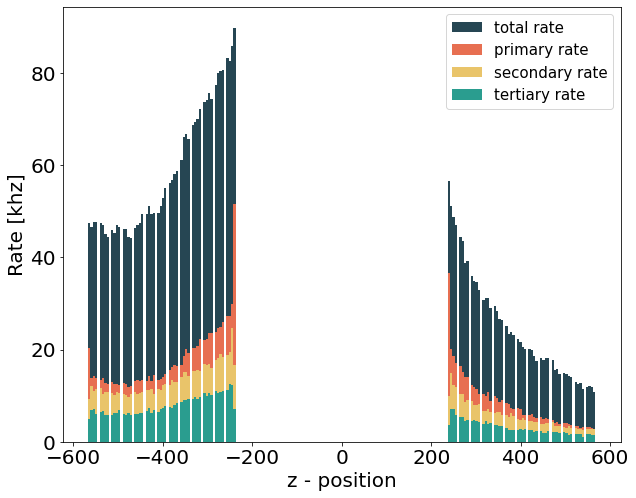

In [43]:
#plt.bar(result_rate.T[0], result_rate.T[1], width = 2)
fig = plt.figure(figsize=(10, 8))

plt.hist(result_rate.T[0], weights=result_rate.T[1]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="total rate")
plt.hist(result_rate.T[0], weights=result_rate.T[2]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="primary rate")
plt.hist(result_rate.T[0], weights=result_rate.T[3]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="secondary rate")
plt.hist(result_rate.T[0], weights=result_rate.T[4]*fac_khz, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="tertiary rate")
plt.legend(fontsize=15)
#plt.yticks([])
plt.ylabel("Rate [khz]")
plt.xlabel("z - position")
plt.show()

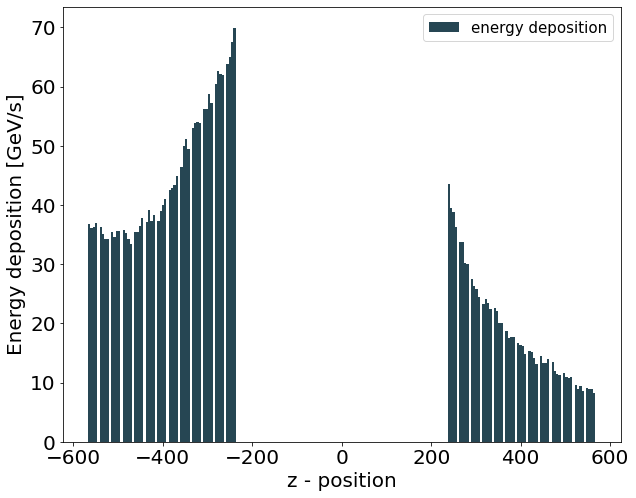

In [44]:
#plt.bar(result_rate.T[0], result_rate.T[1], width = 2)
fig = plt.figure(figsize=(10, 8))
plt.hist(result_rate.T[0], weights=result_rate.T[5]*fac/1000, bins=220, range=(min(result_rate.T[0]),max(result_rate.T[0])), label="energy deposition")
plt.legend(fontsize=15)
#plt.yticks([])
plt.ylabel("Energy deposition [GeV/s]")
plt.xlabel("z - position")
plt.show()

In [22]:
#melp.addSensorHits("run42_20000.root", traj=True)

In [23]:
hitangle = melp.getHitAngle(rec_type="Truth", angle="theta")

In [24]:
#print(hitangle[1])

In [25]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [42]
  - Loaded Runs (Pixel):  []
------------------------------


In [26]:
#mu3e_detector.SensorsModules.sensor[1].hit

In [27]:
#mu3e_detector.TileDetector.tile[200000].hits

In [28]:
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

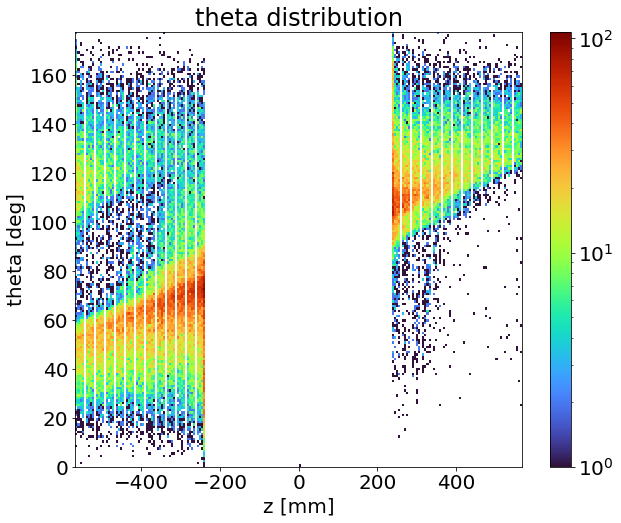

In [29]:
import numpy as np
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta [deg]")
plt.xlabel("z [mm]")
plt.colorbar(im)
plt.show()